In [2]:
# Loading common data related modules
#1.Import modułów do uczenia maszynowego
import numpy as np
import pandas as pd
import math 

In [3]:
# Loading modelling algorithms.
#2.Import określonych modułów uczenia maszynowego
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import AdaBoostRegressor
from sklearn.ensemble     import RandomForestRegressor

In [4]:
# Loading tools
#3.import funkcji które pozwalają na przetwarzanie danych
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import r2_score

In [7]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Loading visualisation modules
#4. import funkcji odpowiedzialnych za wizualizację danych
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [6]:
# Configure visualisations 
#5.konfiguracja działania funkcji z poszczególnych modułów o ile to możliwe
%matplotlib inline

In [7]:
# Ignore warning messages
#6.usuwamy warnings(opcjonalne)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#7 Ładujemy dane
#osoba analizująca dane powinna merytorycznie znać analaizowany temat. Czasem mamy do czynienia z wiedzą ktora jest powszechnie znana. 
#Czasem jednak potrzebna jest wiedza specjalistyczna 

In [8]:
diamonds = pd.read_csv(r'C:\Dane\2_ML_Projekty\004_ML kurs 001 regresja bazy\diamonds\diamonds.csv')

In [9]:
#8. Oglądamy dane
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
#8. Oglądamy dane table rozmiar wyszlifowanej góry-szlif na danym diamencie,  clarity przjerzystość,depth głębokośc diamentu, 
#kolor oznaczenie literowe, cena, rozmairy x,y,z kolumna unnamed nie jest potrzebna..
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [24]:
# Review and clean the data (may be a repetitive task)
# remove unnecessary columns
#9 usunięcie niepotrzebnych kolumn i przeglądanie tego co zostało aby sprawdzić czy nie ma błedów
diamonds.head()
diamonds.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# review the data and get intuition about it
#10.53940 diamentów i 10 kolumn. Jeśli sa wartości N?A to trzeba to ogarnac i podjac decyzje co robimy z tymi danynmi
diamonds.shape
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<Axes: >

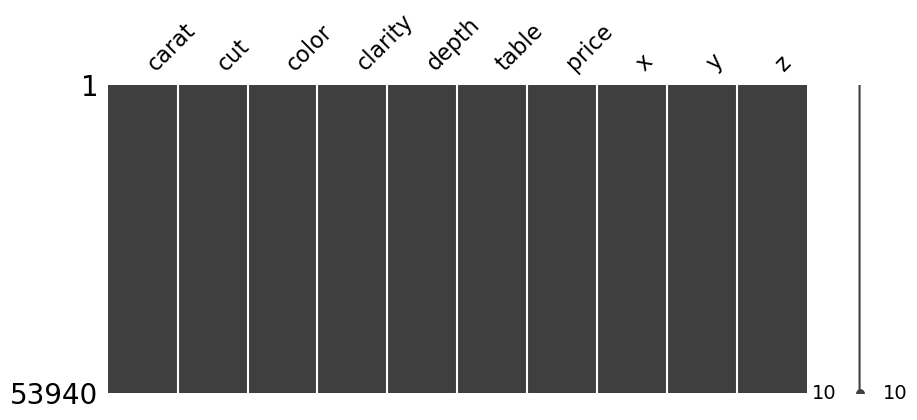

In [26]:
# find and eliminate nulls
#11.Funckja do wykrywania wartości nieznanych. Jesli są to pojawia się biały pasek na wykresie
diamonds.isnull().sum()
msno.matrix(diamonds, figsize=(10,4)) # just to visualize. no missing values.
#Powinny zostac wyświetlon ewartości z odchylenia standardowego

In [17]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:

# search for illogical values
#12.Może są inne przesłanki do tego aby jakieś dane usunąć funkcja describe zwraca podstawowe 
#informacje na temat każdej kolumny występujacej w danych. Funkcja len do wyseietlania danych gdzie sa 
#zerowwe rozmairy x,y,z wtedy je wyrzucimy

diamonds.describe()
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]
# always check after execution
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


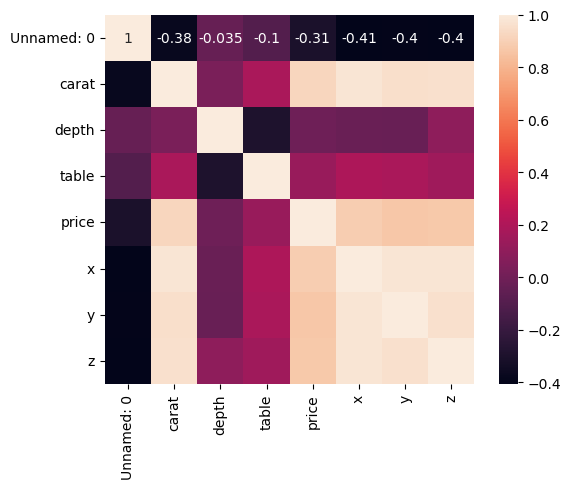

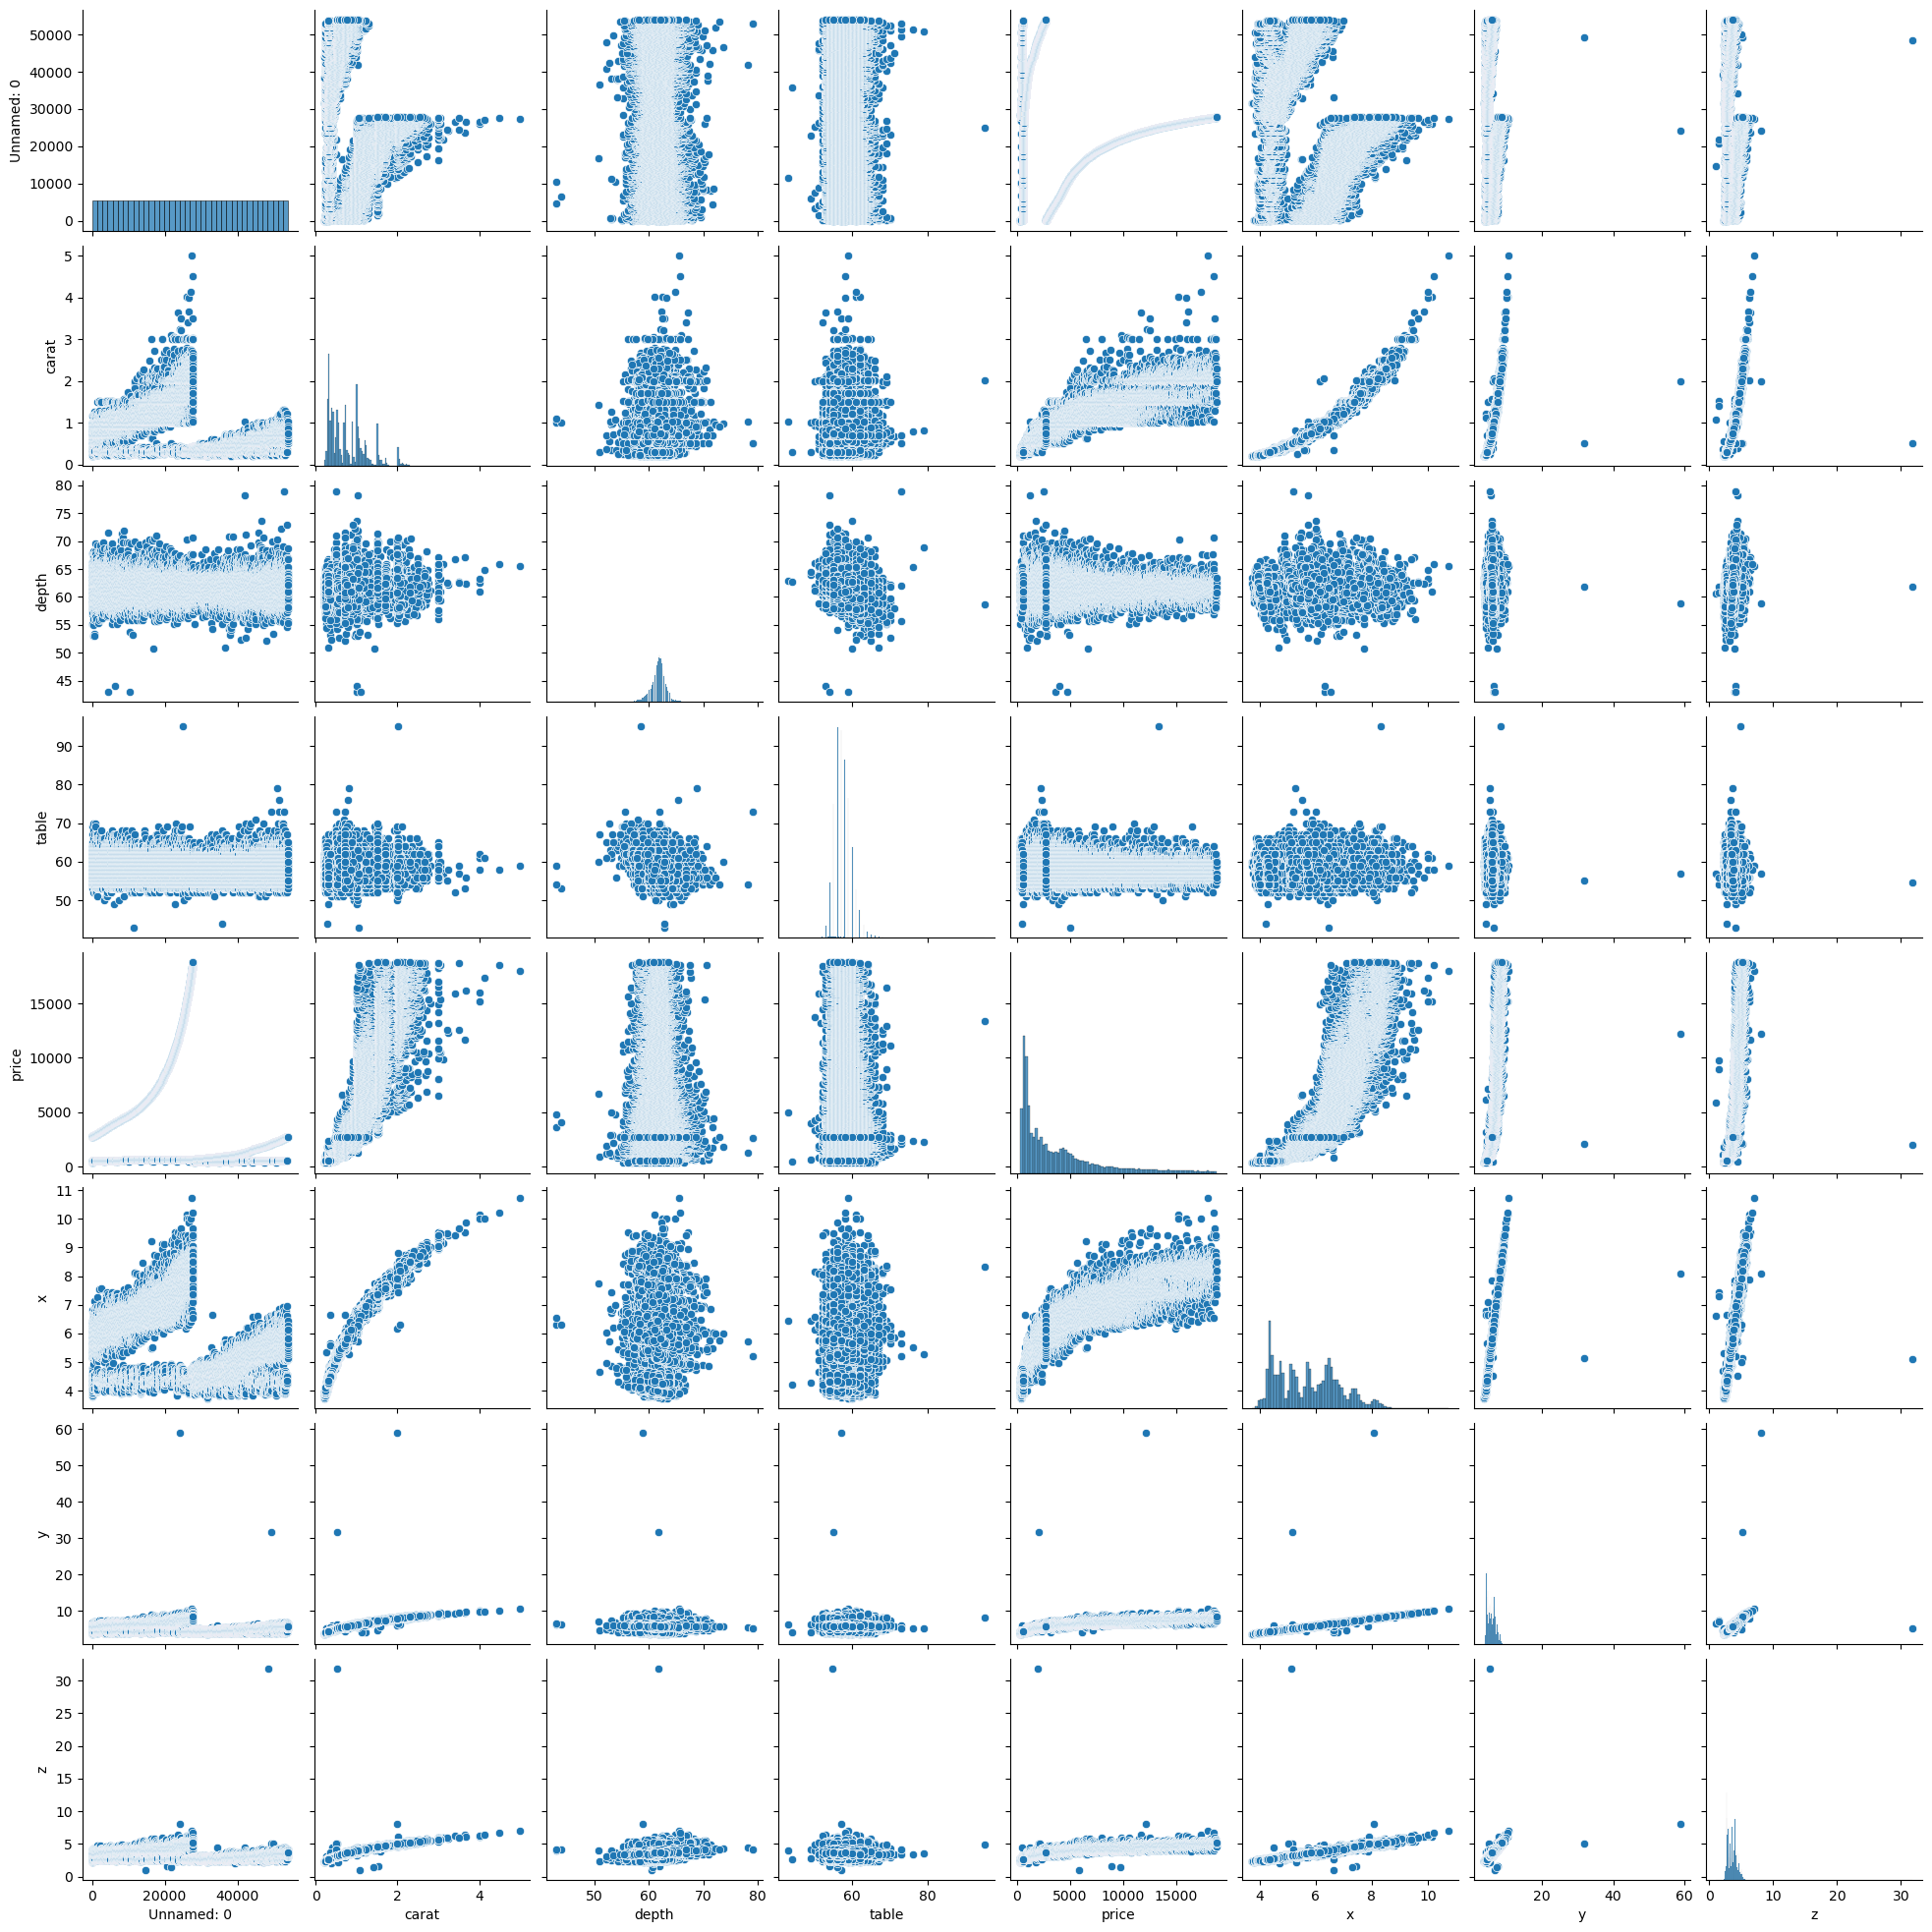

In [15]:
# Detect dependencies in the data
#13badanie zaleznosciw ystępujacych w danych tworzymy macie rz korelacji korelacja dodatnie jedna wartość rośnie druga też. 
#Wartości mogą być doatanie lub ujemne. Ujemna gdy wraz ze wzrostem jednej druga maleje.jak dwie wartosci są ze soba skorelowane
#to wystarczy analiza jednej z nich
corr = diamonds.corr(numeric_only=True)
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
sns.pairplot(diamonds)
#funkcja parplot pokazuje jakie wartości sa ze soba skorelowane oraz jak ta korelacja wygląda

In [ ]:
#Powyższe wykresy korelacji dają wiele informacji np korelacja między table a x albo table a ceną

(array([1.3092e+04, 1.0846e+04, 6.8450e+03, 3.9820e+03, 9.0050e+03,
        3.5410e+03, 2.7560e+03, 1.4020e+03, 2.8100e+02, 1.4940e+03,
        4.1000e+02, 1.4100e+02, 7.4000e+01, 1.1000e+01, 2.6000e+01,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.2   , 0.3924, 0.5848, 0.7772, 0.9696, 1.162 , 1.3544, 1.5468,
        1.7392, 1.9316, 2.124 , 2.3164, 2.5088, 2.7012, 2.8936, 3.086 ,
        3.2784, 3.4708, 3.6632, 3.8556, 4.048 , 4.2404, 4.4328, 4.6252,
        4.8176, 5.01  ]),
 <BarContainer object of 25 artists>)

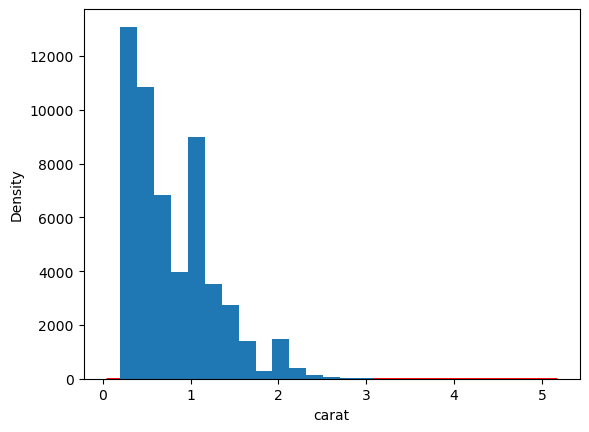

In [32]:
# check distribution
#14.rozklad cechy karat dla wszystkich próbek.
sns.kdeplot(diamonds['carat'], fill=True , color='r')
plt.hist(diamonds['carat'], bins=25)

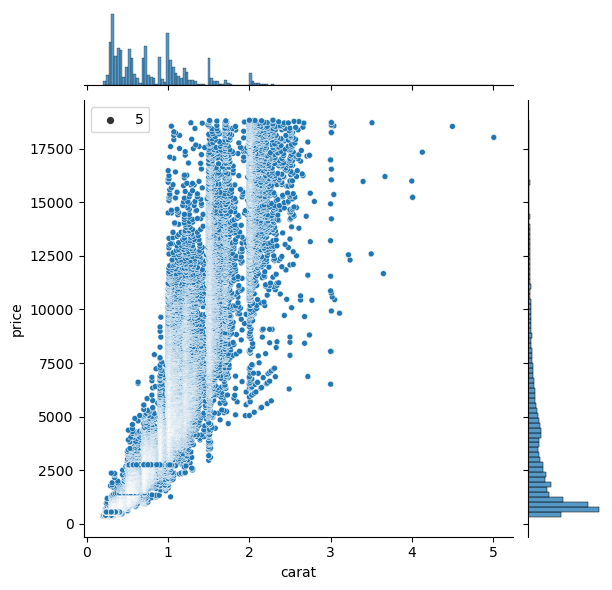

In [33]:
# check correlation graph
#15. Analiza korelacji liczba karatów cena
sns.jointplot(x='carat' , y='price' , data=diamonds , size=5)
#rozkład wartosci karatów od ceny i ich korelacja kropki rozkład to słupki Dużo diamentów które mają niska wartość carat i maja niską cenę

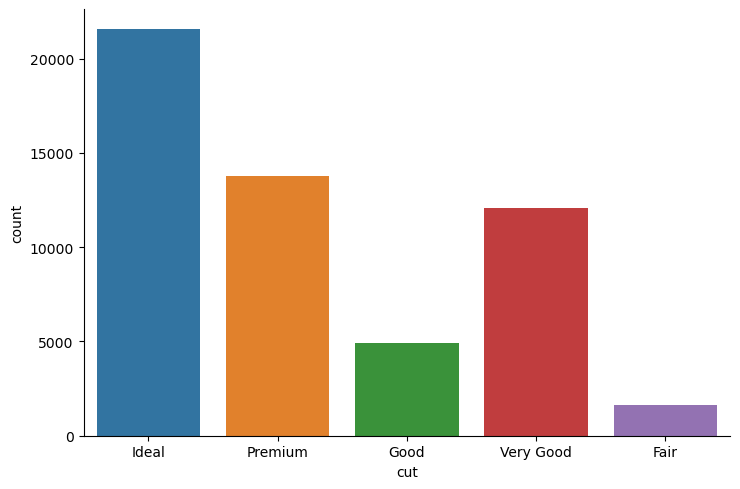

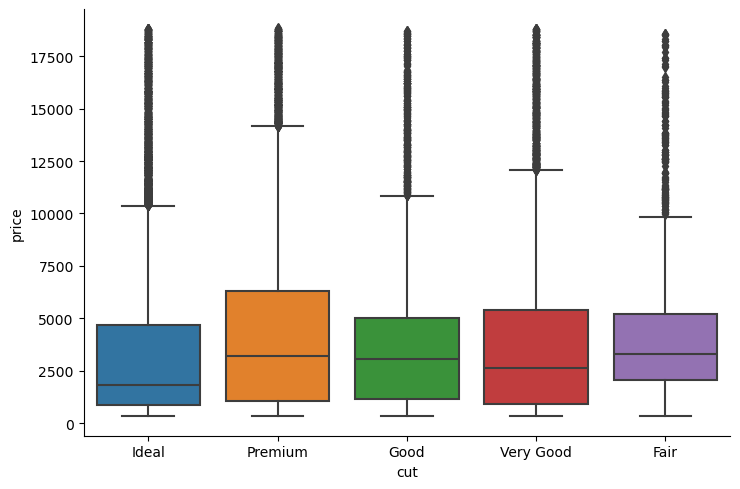

In [34]:
# analyze feature by feature, create hypotesis, try to find evidence. 
#16.Analiza wartości dyskretnych cut rodzaj szlifu:Ile diamentów uzyskało szlify określonego rodzaju. 
#Diamenty ze szlifem fair mają cene powyżej średniej dla innych szlifów
sns.catplot(x='cut', data=diamonds , kind='count',aspect=1.5)
sns.catplot(x='cut', y='price', data=diamonds, kind='box' ,aspect=1.5)

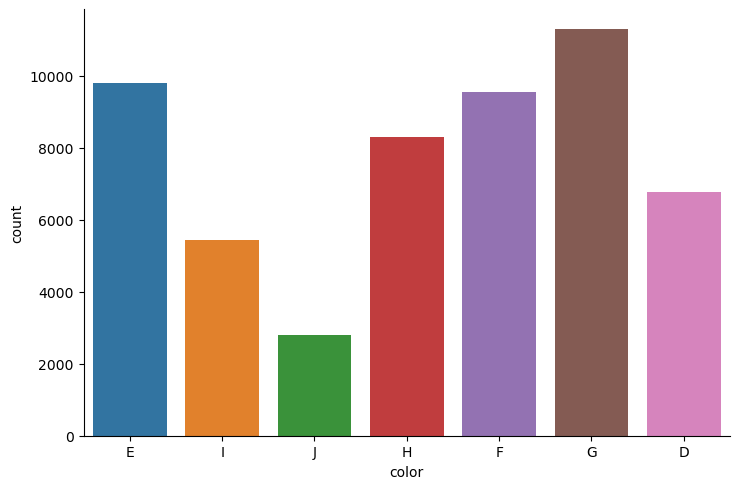

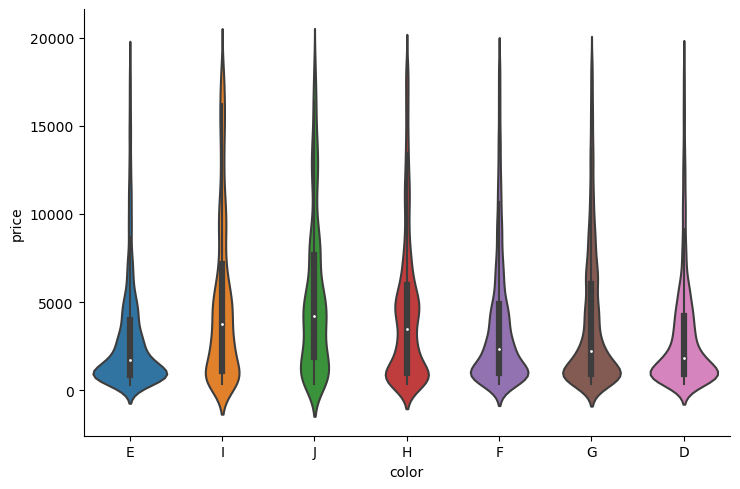

In [35]:
#kolor J wydaje się być kolorem najrzadszym...
sns.catplot(x='color', data=diamonds , kind='count',aspect=1.5)
sns.catplot(x='color', y='price' , data=diamonds , kind='violin', 
               aspect=1.5)

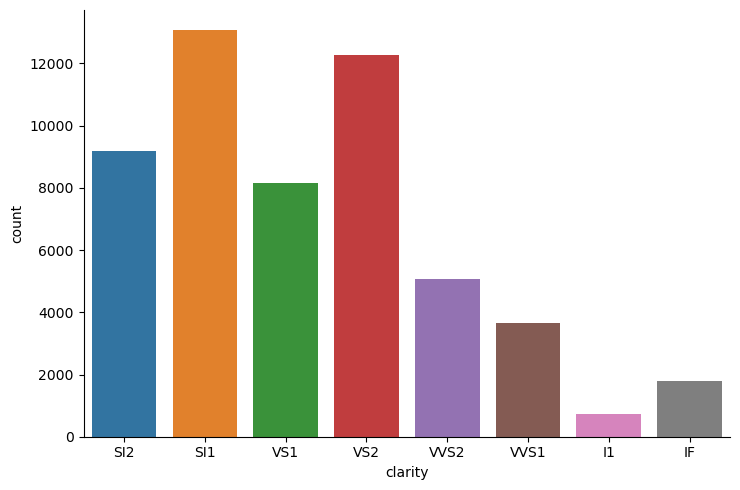

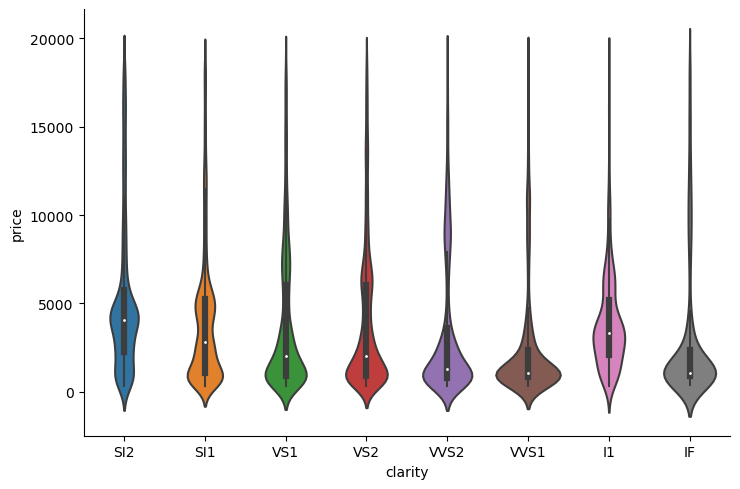

In [36]:
# try to use different visualisation methods
#16 to samo dla caliry czystości patrzymy ile diamentów wpadło do każdej z grup wykresu pudełkowego.
sns.catplot(x='clarity', data=diamonds , kind='count',aspect=1.5)
sns.catplot(x='clarity', y='price' , data=diamonds , kind='violin', 
               aspect=1.5)

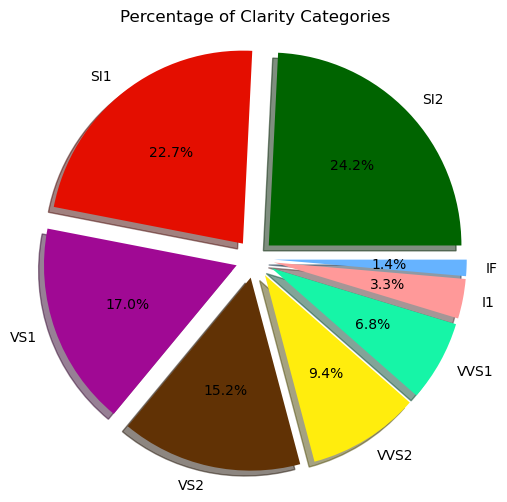

In [37]:
labels = diamonds.clarity.unique().tolist()
sizes = diamonds.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', 
          '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

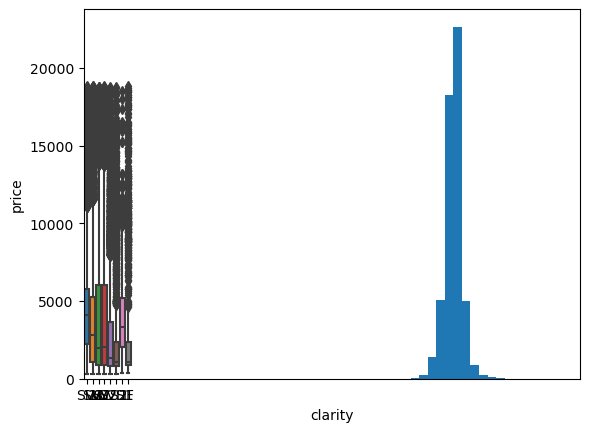

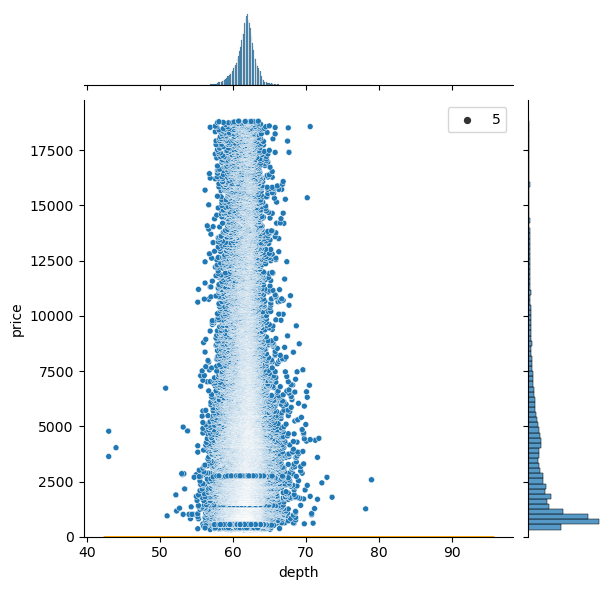

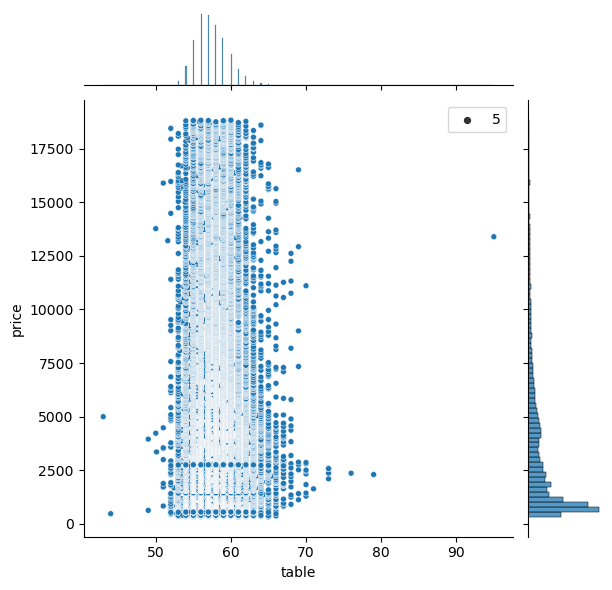

In [38]:
# try to find specific groups/classifications - repetitive process
#17. Analiza grup przejrzystości do ceny po lewej a po prawej histogram pokazujący głębokosc diamnetów
sns.boxplot(x='clarity', y='price', data=diamonds)
#
plt.hist('depth' , data=diamonds , bins=25)
sns.jointplot(x='depth', y='price', data=diamonds, size=5)
#
sns.kdeplot(diamonds['table'], fill=True , color='orange')
sns.jointplot(x='table', y='price', data=diamonds , size=5)

,carat,depth,table,price,volume,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,34.505856,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,38.076885,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,46.724580,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,51.917250,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


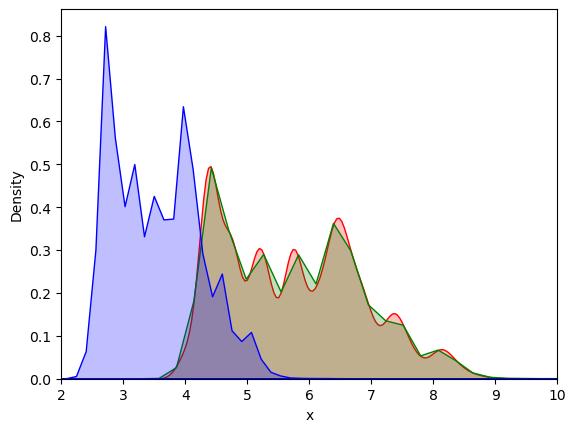

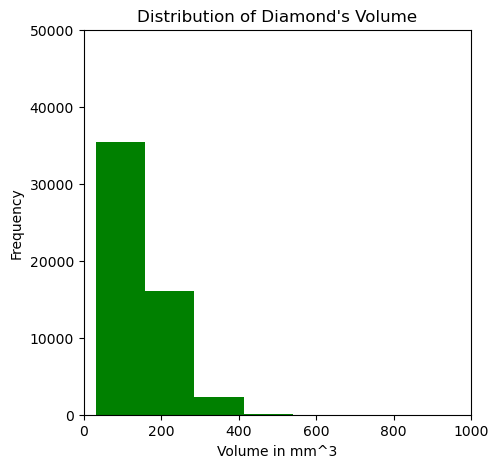

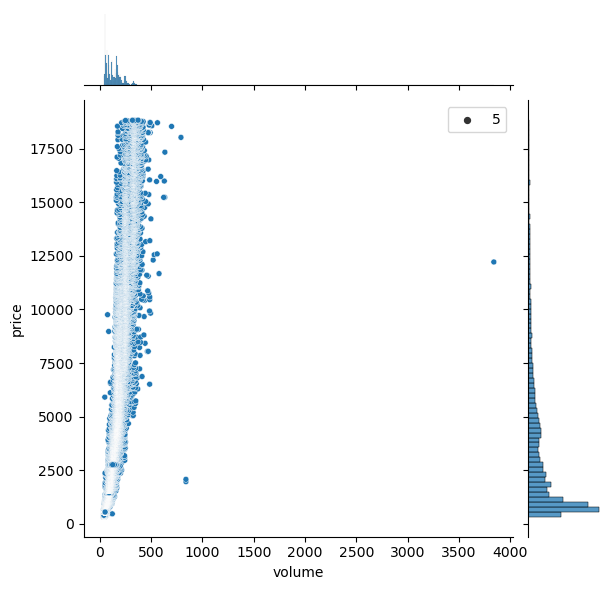

In [39]:
# feature engineering - ananlyzing separately xyz doesn't make sense
sns.kdeplot(diamonds['x'] , fill=True , color='r' )
sns.kdeplot(diamonds['y'] , fill=True , color='g' )
sns.kdeplot(diamonds['z'] , fill= True , color='b')
plt.xlim(2,10)
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds.head()
#
plt.figure(figsize=(5,5))
plt.hist( x=diamonds['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)
#
sns.jointplot(x='volume', y='price' , data=diamonds, size=5)
#
diamonds.drop(['x','y','z'], axis=1, inplace= True)
diamonds.head()
#
# One hot encoding
diamonds = pd.get_dummies(diamonds, prefix_sep='_', drop_first=True)
diamonds.head()

In [41]:
# splitting data into features X, and labels y
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']
#
# splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=66)

In [42]:
# scaling values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.44478313,  0.17288101, -0.20322089, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       [-0.54732375,  1.08170564,  1.13910995, ..., -0.54065658,
        -0.269607  ,  3.09437247],
       [-1.03282286, -0.52621485, -0.65066451, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       ...,
       [ 0.5081091 ,  0.59233853,  0.24422272, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       [ 0.46589178,  0.45251936, -1.09810812, ..., -0.54065658,
        -0.269607  , -0.3231673 ],
       [ 2.78784405,  0.2427906 , -0.65066451, ..., -0.54065658,
        -0.269607  , -0.3231673 ]])

In [43]:
# test different algorithms to get the data predictions 
scores = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 
          'Ridge Regression', 'RandomForest Regression', 
          'KNeighbours Regression']

In [44]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Linear Regression R2: {0:.2f}'.format(r2))
 
 
# Lasso
lasso = Lasso()
lasso.fit(X_train , y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Lasso Regression R2: {0:.2f}'.format(r2))
 
 
# Adaboost classifier
adaboost = AdaBoostRegressor(n_estimators=1000)
adaboost.fit(X_train , y_train)
y_pred = adaboost.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('AdaBoost Regression R2: {0:.2f}'.format(r2))
 
# Ridge
ridge = Ridge()
ridge.fit(X_train , y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Ridge Regression R2: {0:.2f}'.format(r2))
 
 
# Random forest
randomforest = RandomForestRegressor()
randomforest .fit(X_train , y_train)
y_pred = randomforest .predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('Random Forest R2: {0:.2f}'.format(r2))
 
 
# K-Neighbours
kneighbours = KNeighborsRegressor()
kneighbours.fit(X_train , y_train)
y_pred = kneighbours.predict(X_test)
r2 = r2_score(y_test, y_pred)
 
scores.append(r2)
print('K-Neighbours Regression R2: {0:.2f}'.format(r2))
 
 

Linear Regression R2: 0.92
Lasso Regression R2: 0.92
AdaBoost Regression R2: 0.79
Ridge Regression R2: 0.92
Random Forest R2: 0.98
K-Neighbours Regression R2: 0.95


<Axes: xlabel='R2-Scores', ylabel='Algorithms'>

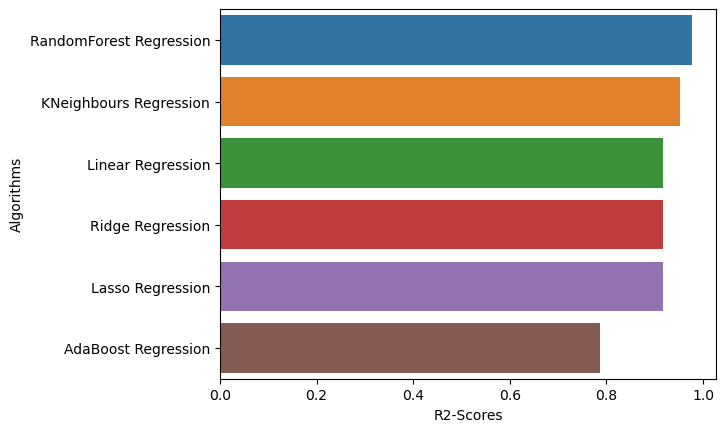

In [45]:
ranking = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : scores})
ranking = ranking.sort_values(by='R2-Scores' ,ascending=False)
ranking
 
sns.barplot(x='R2-Scores' , y='Algorithms' , data=ranking)